In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.utils.class_weight import compute_class_weight

In [94]:
df = pd.read_csv("../data/raw/combat_results_lvl_5.csv")
df.head()

,Unnamed: 0,pc1_class,pc1_level,pc1_hp_max,pc1_ac,pc1_STR,pc1_DEX,pc1_CON,pc1_INT,pc1_WIS,...,monster7_STR,monster7_DEX,monster7_CON,monster7_INT,monster7_WIS,monster7_CHA,winner,not_conscious_players_ratio,party_hp_ratio,difficulty
0,0,Bard,4,22,13,2,2,-1,-1,2,...,0,0,0,0,0,0,party,0.0,0.898204,1
1,1,Bard,4,35,14,-1,3,1,1,-1,...,0,0,0,0,0,0,party,0.0,0.775862,1
2,2,Bard,4,21,13,2,2,0,3,-1,...,0,0,0,0,0,0,party,0.0,0.714286,2
3,3,Bard,4,34,10,1,-1,3,0,-1,...,0,0,0,0,0,0,party,0.0,0.856250,1
4,4,Bard,4,36,12,0,1,4,0,2,...,0,0,0,0,0,0,party,0.0,0.836478,1


In [95]:
combats_df = df.drop([
    "Unnamed: 0",

    "pc1_hp_max",
    "pc1_ac",
    "pc1_STR",
    "pc1_DEX",
    "pc1_CON",
    "pc1_INT",
    "pc1_WIS",
    "pc1_CHA",

    "pc2_hp_max",
    "pc2_ac",
    "pc2_STR",
    "pc2_DEX",
    "pc2_CON",
    "pc2_INT",
    "pc2_WIS",
    "pc2_CHA",

    "pc3_hp_max",
    "pc3_ac",
    "pc3_STR",
    "pc3_DEX",
    "pc3_CON",
    "pc3_INT",
    "pc3_WIS",
    "pc3_CHA",

    "pc4_hp_max",
    "pc4_ac",
    "pc4_STR",
    "pc4_DEX",
    "pc4_CON",
    "pc4_INT",
    "pc4_WIS",
    "pc4_CHA",

    "pc5_hp_max",
    "pc5_ac",
    "pc5_STR",
    "pc5_DEX",
    "pc5_CON",
    "pc5_INT",
    "pc5_WIS",
    "pc5_CHA",

    "pc6_hp_max",
    "pc6_ac",
    "pc6_STR",
    "pc6_DEX",
    "pc6_CON",
    "pc6_INT",
    "pc6_WIS",
    "pc6_CHA",

    "pc7_hp_max",
    "pc7_ac",
    "pc7_STR",
    "pc7_DEX",
    "pc7_CON",
    "pc7_INT",
    "pc7_WIS",
    "pc7_CHA",

    "monster1_name",
    "monster1_hp_max",
    "monster1_ac",
    "monster1_STR",
    "monster1_DEX",
    "monster1_CON",
    "monster1_INT",
    "monster1_WIS",
    "monster1_CHA",

    "monster2_name",
    "monster2_hp_max",
    "monster2_ac",
    "monster2_STR",
    "monster2_DEX",
    "monster2_CON",
    "monster2_INT",
    "monster2_WIS",
    "monster2_CHA",

    "monster3_name",
    "monster3_hp_max",
    "monster3_ac",
    "monster3_STR",
    "monster3_DEX",
    "monster3_CON",
    "monster3_INT",
    "monster3_WIS",
    "monster3_CHA",

    "monster4_name",
    "monster4_hp_max",
    "monster4_ac",
    "monster4_STR",
    "monster4_DEX",
    "monster4_CON",
    "monster4_INT",
    "monster4_WIS",
    "monster4_CHA",

    "monster5_name",
    "monster5_hp_max",
    "monster5_ac",
    "monster5_STR",
    "monster5_DEX",
    "monster5_CON",
    "monster5_INT",
    "monster5_WIS",
    "monster5_CHA",

    "monster6_name",
    "monster6_hp_max",
    "monster6_ac",
    "monster6_STR",
    "monster6_DEX",
    "monster6_CON",
    "monster6_INT",
    "monster6_WIS",
    "monster6_CHA",

    "monster7_name",
    "monster7_hp_max",
    "monster7_ac",
    "monster7_STR",
    "monster7_DEX",
    "monster7_CON",
    "monster7_INT",
    "monster7_WIS",
    "monster7_CHA",

    "winner",
    "not_conscious_players_ratio",
    "party_hp_ratio"
], axis=1)

combats_df.head()

,pc1_class,pc1_level,pc2_class,pc2_level,pc3_class,pc3_level,pc4_class,pc4_level,pc5_class,pc5_level,...,pc7_class,pc7_level,monster1_cr,monster2_cr,monster3_cr,monster4_cr,monster5_cr,monster6_cr,monster7_cr,difficulty
0,Bard,4,Bard,4,Barbarian,4,Bard,4,FighterStr,4,...,-,0,0.5,0.25,0.5,0.125,0.125,0.25,0.0,1
1,Bard,4,Bard,4,Barbarian,4,Bard,4,FighterStr,4,...,-,0,0.5,0.25,0.5,0.125,0.125,0.25,0.0,1
2,Bard,4,Bard,4,Barbarian,4,Bard,4,FighterStr,4,...,-,0,0.5,0.25,0.5,0.125,0.125,0.25,0.0,2
3,Bard,4,Bard,4,Barbarian,4,Bard,4,FighterStr,4,...,-,0,0.5,0.25,0.5,0.125,0.125,0.25,0.0,1
4,Bard,4,Bard,4,Barbarian,4,Bard,4,FighterStr,4,...,-,0,0.5,0.25,0.5,0.125,0.125,0.25,0.0,1


In [96]:
combats_df["pc_lvl"] = combats_df["pc1_level"]

combats_df = combats_df.drop([
    "pc1_level",
    "pc2_level",
    "pc3_level",
    "pc4_level",
    "pc5_level",
    "pc6_level",
    "pc7_level"
], axis=1)

combats_df.head()

,pc1_class,pc2_class,pc3_class,pc4_class,pc5_class,pc6_class,pc7_class,monster1_cr,monster2_cr,monster3_cr,monster4_cr,monster5_cr,monster6_cr,monster7_cr,difficulty,pc_lvl
0,Bard,Bard,Barbarian,Bard,FighterStr,-,-,0.5,0.25,0.5,0.125,0.125,0.25,0.0,1,4
1,Bard,Bard,Barbarian,Bard,FighterStr,-,-,0.5,0.25,0.5,0.125,0.125,0.25,0.0,1,4
2,Bard,Bard,Barbarian,Bard,FighterStr,-,-,0.5,0.25,0.5,0.125,0.125,0.25,0.0,2,4
3,Bard,Bard,Barbarian,Bard,FighterStr,-,-,0.5,0.25,0.5,0.125,0.125,0.25,0.0,1,4
4,Bard,Bard,Barbarian,Bard,FighterStr,-,-,0.5,0.25,0.5,0.125,0.125,0.25,0.0,1,4


In [97]:
num_pcs_col = []
pc_aux_df = combats_df.drop([
    "difficulty",
    "pc_lvl",
    "monster1_cr",
    "monster2_cr",
    "monster3_cr",
    "monster4_cr",
    "monster5_cr",
    "monster6_cr",
    "monster7_cr",
], axis=1)

for i in range(len(pc_aux_df)):
    num_pcs = 0

    row = pd.DataFrame(pc_aux_df.iloc[i])
    row.columns = ["col"]

    for i in row["col"]:
        if i == "-":
            continue
        num_pcs += 1

    num_pcs_col.append(num_pcs)


num_monsters_col = []
monsters_aux_df = combats_df.drop([
    "difficulty",
    "pc_lvl",
    "pc1_class",
    "pc2_class",
    "pc3_class",
    "pc4_class",
    "pc5_class",
    "pc6_class",
    "pc7_class"
], axis=1)

for i in range(len(monsters_aux_df)):
    num_monsters = 0

    row = pd.DataFrame(monsters_aux_df.iloc[i])
    row.columns = ["col"]

    for i in row["col"]:
        if i == 0.0:
            continue
        num_monsters += 1

    num_monsters_col.append(num_monsters)

combats_df["num_pcs"] = num_pcs_col
combats_df["num_monsters"] = num_monsters_col
combats_df.head()

,pc1_class,pc2_class,pc3_class,pc4_class,pc5_class,pc6_class,pc7_class,monster1_cr,monster2_cr,monster3_cr,monster4_cr,monster5_cr,monster6_cr,monster7_cr,difficulty,pc_lvl,num_pcs,num_monsters
0,Bard,Bard,Barbarian,Bard,FighterStr,-,-,0.5,0.25,0.5,0.125,0.125,0.25,0.0,1,4,5,6
1,Bard,Bard,Barbarian,Bard,FighterStr,-,-,0.5,0.25,0.5,0.125,0.125,0.25,0.0,1,4,5,6
2,Bard,Bard,Barbarian,Bard,FighterStr,-,-,0.5,0.25,0.5,0.125,0.125,0.25,0.0,2,4,5,6
3,Bard,Bard,Barbarian,Bard,FighterStr,-,-,0.5,0.25,0.5,0.125,0.125,0.25,0.0,1,4,5,6
4,Bard,Bard,Barbarian,Bard,FighterStr,-,-,0.5,0.25,0.5,0.125,0.125,0.25,0.0,1,4,5,6


In [98]:
combats_df = combats_df.drop([
    "pc1_class",
    "pc2_class",
    "pc3_class",
    "pc4_class",
    "pc5_class",
    "pc6_class",
    "pc7_class"
], axis=1)

combats_df.head()

,monster1_cr,monster2_cr,monster3_cr,monster4_cr,monster5_cr,monster6_cr,monster7_cr,difficulty,pc_lvl,num_pcs,num_monsters
0,0.5,0.25,0.5,0.125,0.125,0.25,0.0,1,4,5,6
1,0.5,0.25,0.5,0.125,0.125,0.25,0.0,1,4,5,6
2,0.5,0.25,0.5,0.125,0.125,0.25,0.0,2,4,5,6
3,0.5,0.25,0.5,0.125,0.125,0.25,0.0,1,4,5,6
4,0.5,0.25,0.5,0.125,0.125,0.25,0.0,1,4,5,6


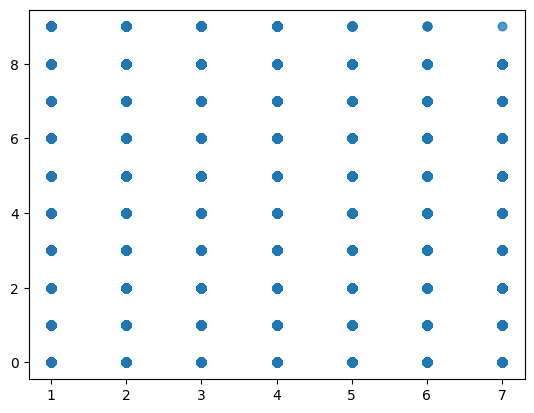

In [99]:
plt.scatter(
    combats_df["num_pcs"],
    combats_df["difficulty"],
    alpha=0.2
)
plt.show()

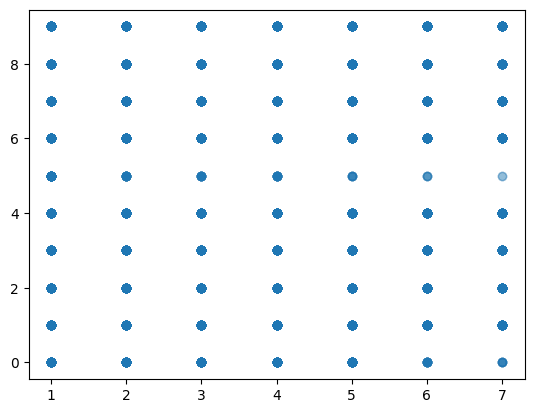

In [42]:
plt.scatter(
    combats_df["num_monsters"],
    combats_df["difficulty"],
    alpha=0.1
)
plt.show()

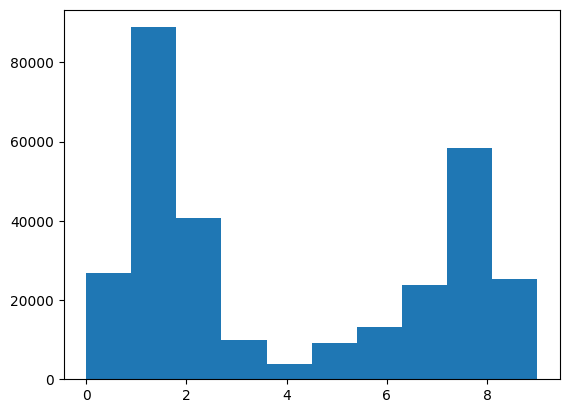

In [100]:
plt.hist(combats_df["difficulty"])
plt.show()

In [103]:
from sklearn.model_selection import train_test_split

X = combats_df.drop("difficulty", axis=1)
y = combats_df["difficulty"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

classes = np.unique(y_train)
weights = compute_class_weight('balanced', classes=classes, y=y_train)
class_weights = dict(zip(classes, weights))


# Linear Regression

In [105]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train, y_train)

LinearRegression()

In [106]:
lr.score(X_train,y_train)

0.7165574975601265

In [107]:
from sklearn.metrics import accuracy_score

y_pred = lr.predict(X_test)

y_pred = np.round(y_pred)
y_pred
accuracy_score(y_test, y_pred)

0.19063333333333332

# Decision Tree Classifier

In [108]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(class_weight=class_weights)

dt.fit(X_train, y_train)

dt.score(X_train, y_train)

0.5765291666666666

In [110]:
y_pred = dt.predict(X_test)

accuracy_score(y_pred,y_test)

0.5077333333333334

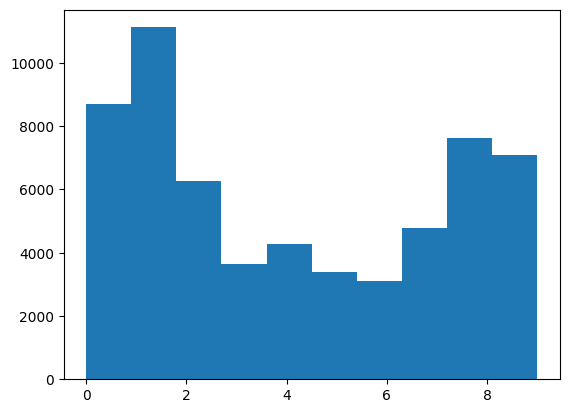

In [111]:
plt.hist(y_pred)
plt.show()

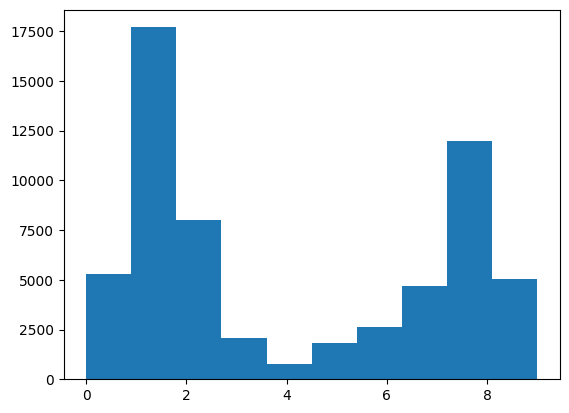

In [112]:
plt.hist(y_test)
plt.show()

# Random Forest

In [115]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth = 20, class_weight=class_weights)

rf.fit(X_train, y_train)

rf.score(X_train, y_train)

0.5935458333333333

In [116]:
y_pred = rf.predict(X_test)

accuracy_score(y_test, y_pred)

0.52725

# XGBoost

In [ ]:
from xgboost import XGBClassifier

model = XGBClassifier(
    objective='multi:softmax',
    num_class=10,
    n_estimators=100,
    max_depth=20,
    learning_rate=0.01,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    class_weight=class_weights
)

model.fit(X_train, y_train)

model.score(X_train, y_train)

/mnt/5228752828750BEB/Maestría/semestre_2/aprendizaje_automatico/Foresight/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:29:48] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "class_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


0.6442625

In [121]:
y_pred = model.predict(X_test)

accuracy_score(y_test, y_pred)

0.6017666666666667

# Red Neuronal

In [125]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Input

import keras_tuner as kt

In [126]:
def build_model(hp):
    model = Sequential()
    model.add( Input(  shape=(X_train.shape[1],)) )


    for i in range(hp.Int("num_layers", 1, 2)):  # Tune the number of layers.
        model.add(
            Dense(
                units      = hp.Int   (f'units_{i}', min_value=1, max_value=25, step=2 ), # <--- [1..15]
                activation = hp.Choice(f"activation_{i}", ["relu", "selu","leaky_relu"]),
            )
        )

    model.add( Dense( 1, activation = 'linear', name = "predictions" ) ) # <---- capa de salida

    lr = hp.Choice( 'lr', values=[1e-2, 1e-3, 1e-4] )
    optimizers_dict = {
       "Adam":    keras.optimizers.Adam(learning_rate=lr),
        "SGD":     keras.optimizers.SGD(learning_rate=lr),
        "Adagrad": keras.optimizers.Adagrad(learning_rate=lr)
        }

    hp_optimizers = hp.Choice(
        'optimizer',
        values=[ "SGD", "Adam", "Adagrad"]
        )

    model.compile( optimizer    = optimizers_dict[hp_optimizers],
                    loss      = "categorical_crossentropy",
                    metrics   = ['AUC', "accuracy"]
                    )

    return model

In [127]:
build_model(kt.HyperParameters())

E0000 00:00:1745358247.177796    8141 cuda_executor.cc:1228] INTERNAL: CUDA Runtime error: Failed call to cudaGetRuntimeVersion: Error loading CUDA libraries. GPU will not be used.: Error loading CUDA libraries. GPU will not be used.
W0000 00:00:1745358247.184286    8141 gpu_device.cc:2341] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


<Sequential name=sequential, built=True>

In [128]:
tuner = kt.RandomSearch( # https://keras.io/api/keras_tuner/tuners/hyperband/
    build_model,
    objective            = kt.Objective('val_AUC', direction='max'),
    executions_per_trial = 1,
  # max_epochs           = 50,
    max_trials           = 10,
  # factor               = 3,
    directory            = 'salida',
    project_name         = 'foresight_nn',
    overwrite            = True
)

In [ ]:
hist = tuner.search(X_train, y_train, validation_split=0.2, class_weight=class_weights, verbose=1 )

In [ ]:
best_hps = tuner.get_best_hyperparameters()[0]
print(f"BEST PARAMETERS:")
print(f"Densa1: {best_hps['units_0']} - Activation: {best_hps['activation_0']}")
print(f"Learning Rate: {best_hps['lr']}")

In [ ]:
best_hps = tuner.get_best_hyperparameters()[0]
mi_mejor_modelo = tuner.hypermodel.build(best_hps)

In [ ]:
mi_mejor_modelo.summary()

In [ ]:
historial = mi_mejor_modelo.fit(X_train, y_train,validation_split=0.2,  epochs=20,  verbose=1 )

In [ ]:
def plot_hist(hist):
    plt.figure(figsize=(16,6))
    plt.plot(hist.history["accuracy"])
    plt.plot(hist.history["val_accuracy"])
    plt.title("model accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epoch")
    plt.legend(["train", "validation"], loc="upper left")
    #plt.ylim((0,1))
    plt.grid()
    plt.show()

plot_hist(historial)

In [ ]:
def plot_hist_auc(hist):
    plt.figure(figsize=(16,6))
    plt.plot(hist.history["AUC"])
    plt.plot(hist.history["val_AUC"])
    plt.title("model AUC")
    plt.ylabel("AUC")
    plt.xlabel("epoch")
    plt.legend(["train", "validation"], loc="upper left")
    #plt.ylim((0,1))
    plt.grid()
    plt.show()

plot_hist_auc(historial)

In [ ]:
def plot_hist_loss(hist):
    plt.figure(figsize=(16,6))
    plt.plot(hist.history["loss"],'.r')
    plt.plot(hist.history["val_loss"],'*b')
    plt.title("model loss")
    plt.ylabel("loss")
    plt.xlabel("epoch")
    plt.legend(["train", "validation"], loc="upper left")
    #plt.ylim((0,1))
    plt.grid()
    plt.show()

plot_hist_loss(historial)

In [ ]:
mi_mejor_modelo.evaluate(X_test, y_test)

In [ ]:
prediccion_test = mi_mejor_modelo.predict(X_test)

In [ ]:
unique_elements, count_elements = np.unique(np.round(prediccion_test),return_counts=True)
print(unique_elements)
print(count_elements)

In [ ]:
prediccion_test=prediccion_test.ravel()

In [ ]:
pred_test = np.zeros(X_test.shape[0])

for id in range(X_test.shape[0]):
    pred_test[id] = np.round( prediccion_test[id] )

In [ ]:
from sklearn.metrics import  ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

con = confusion_matrix( y_test , pred_test )
disp = ConfusionMatrixDisplay( confusion_matrix = con,  display_labels = range(10) ).plot()
plt.show()